<a href="https://colab.research.google.com/github/budhiraja03/my-colab-project/blob/main/ANN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

colors = ['#780000', '#c1121f', '#fdf0d5', '#003049', '#669bbc']

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from mlxtend.plotting import plot_decision_regions
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, ELU

#### **Load the cybersecurity intrusion dataset from CSV**
Read the cybersecurity intrusion dataset from a CSV file into a Pandas DataFrame. This dataset will be used for training and evaluating multiple ML models.

In [4]:
df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


#### **Drop the non-informative 'session_id' column**

In [5]:
df = df.drop(["session_id"],axis=1)

In [6]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


#### **Check dataset structure and data types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   object 
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  9537 non-null   float64
 6   failed_logins        9537 non-null   int64  
 7   browser_type         9537 non-null   object 
 8   unusual_time_access  9537 non-null   int64  
 9   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 745.2+ KB


In [8]:
#List all column names
df.columns

Index(['network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

### **Check for missing values in each column**

In [9]:
df.isna().sum()

,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0
attack_detected,0


### **Handling the missing values**

In [10]:
df['encryption_used'].mode()[0]

'AES'

In [11]:
df['encryption_used'] = df['encryption_used'].apply(lambda x: df['encryption_used'].mode()[0] if pd.isna(x) else x)

### **Data Visualisation**

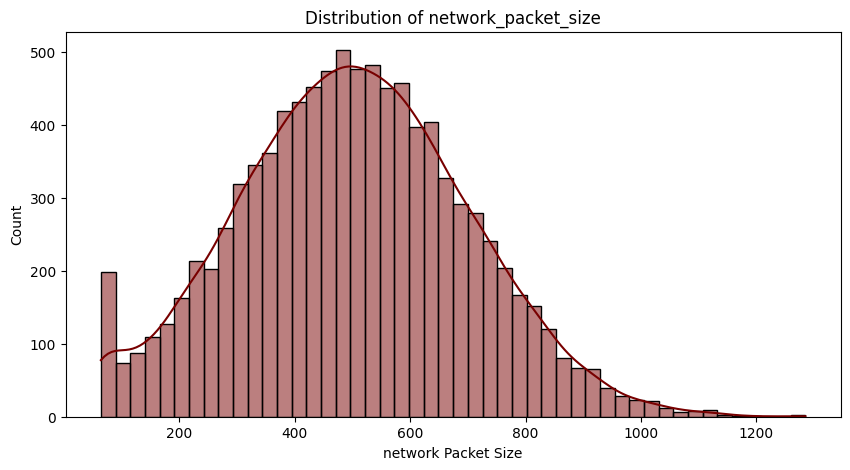

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["network_packet_size"],kde=True, color=colors[0])
plt.xlabel("network Packet Size")
plt.ylabel("Count")
plt.title("Distribution of network_packet_size")
plt.show()

<ipython-input-13-0d7f8780fde7>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df,x=c,hue='attack_detected',palette=colors)


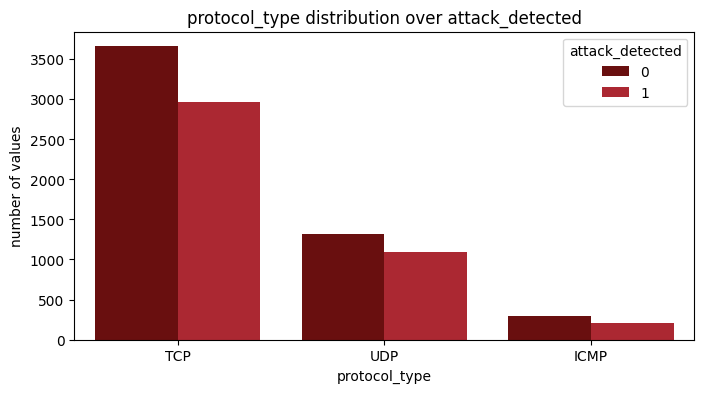

<ipython-input-13-0d7f8780fde7>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df,x=c,hue='attack_detected',palette=colors)


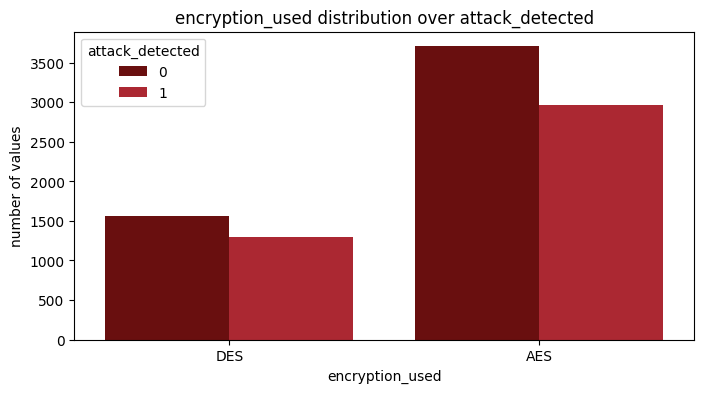

<ipython-input-13-0d7f8780fde7>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df,x=c,hue='attack_detected',palette=colors)


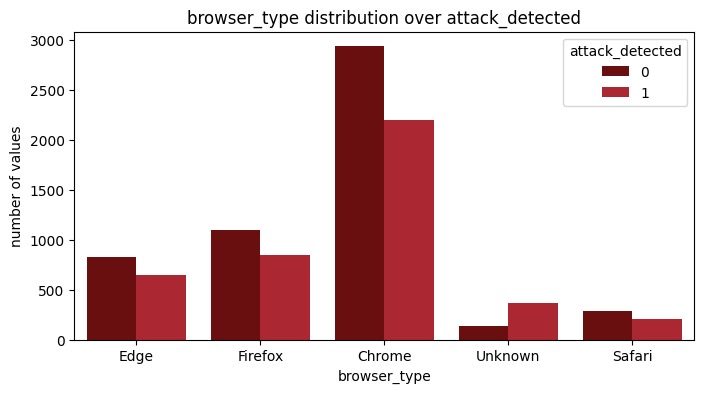

In [13]:
obj_col = df.select_dtypes(include="object")
for c in obj_col.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df,x=c,hue='attack_detected',palette=colors)
    plt.xlabel(c)
    plt.ylabel("number of values")
    plt.title(f"{c} distribution over attack_detected")
    plt.show()

<ipython-input-14-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


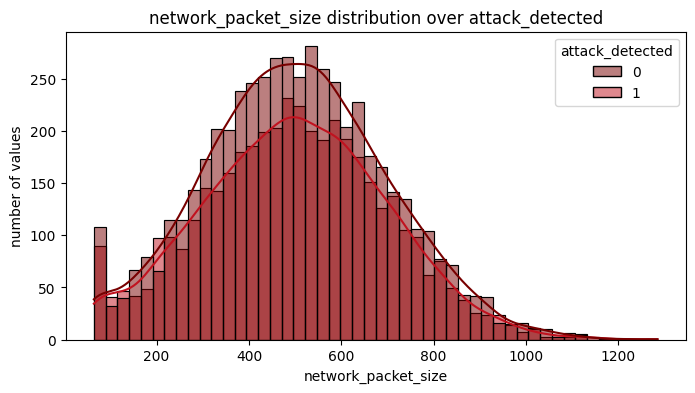

<ipython-input-14-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


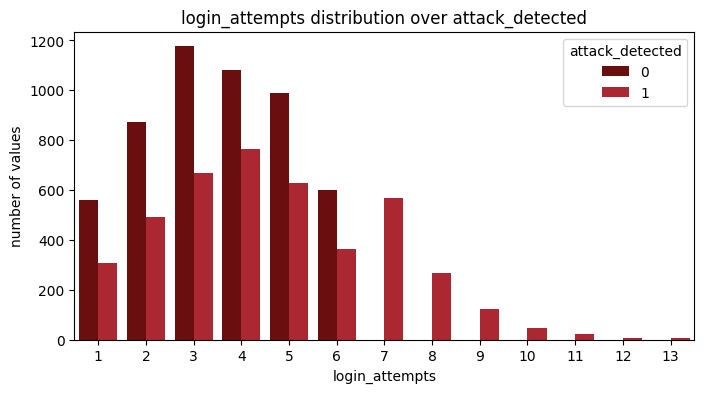

<ipython-input-14-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


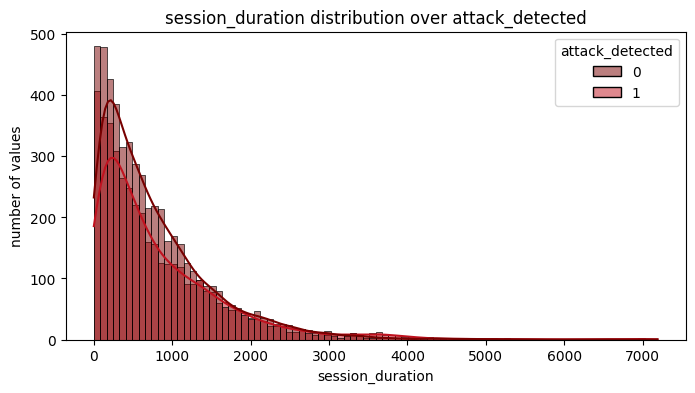

<ipython-input-14-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


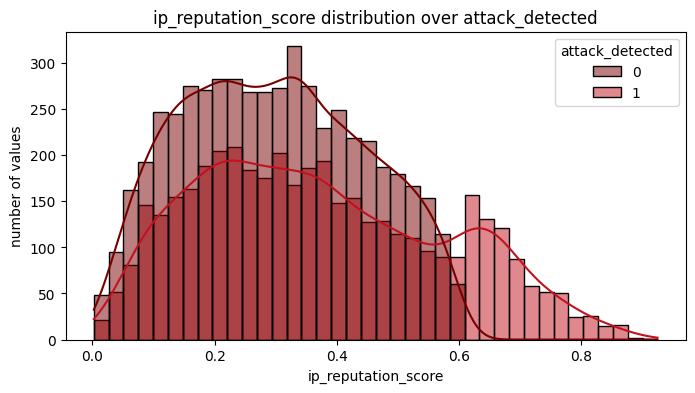

<ipython-input-14-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


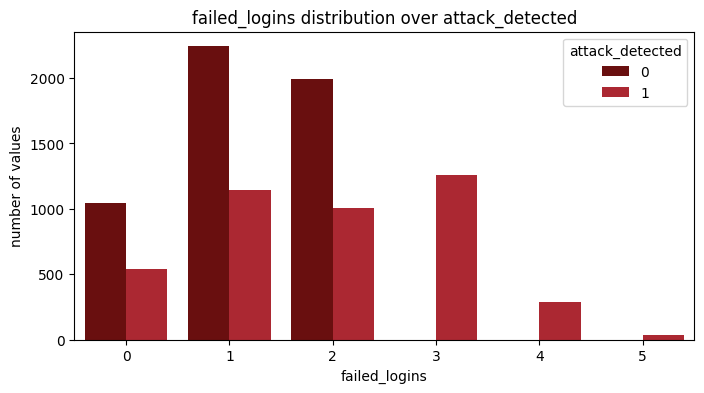

<ipython-input-14-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


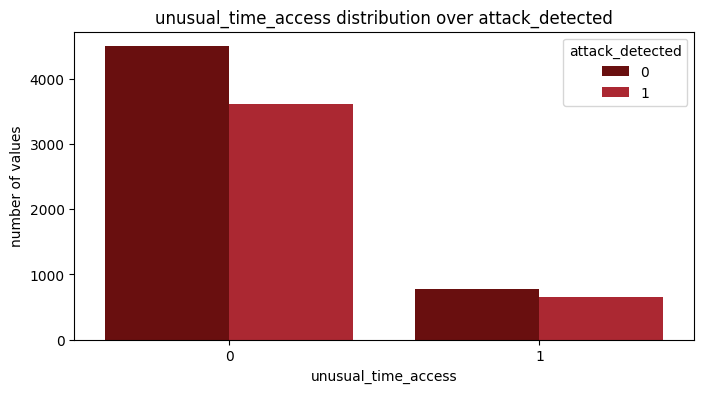

<ipython-input-14-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


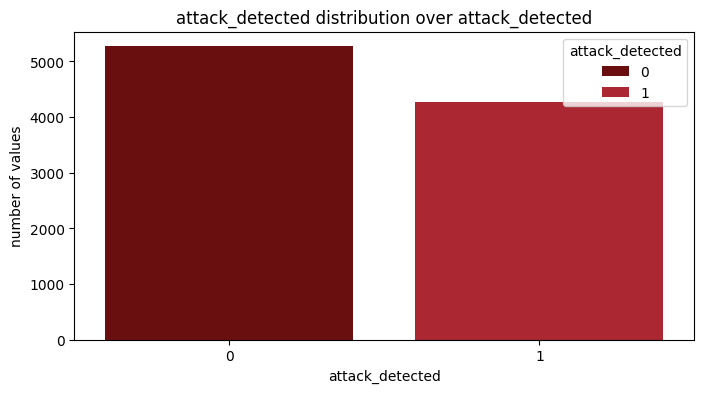

In [14]:
num_col = df.select_dtypes(include=["float64","int64"])
for c in num_col.columns:
    plt.figure(figsize=(8,4))
    if num_col[c].nunique() >15:
        sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)
    else:
        sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)
    plt.xlabel(c)
    plt.ylabel("number of values")
    plt.title(f"{c} distribution over attack_detected")
    plt.show()

### **Encoding categorical columns using LabelEncoder**

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_transformed=df.copy()
columnsNeedEncoding=[]
for i in df.columns:
  if df[i].dtype=='object':
    print(f"Unique values of '{i}' is {df[i].unique()}")
    columnsNeedEncoding.append(i)

Unique values of 'protocol_type' is ['TCP' 'UDP' 'ICMP']
Unique values of 'encryption_used' is ['DES' 'AES']
Unique values of 'browser_type' is ['Edge' 'Firefox' 'Chrome' 'Unknown' 'Safari']


In [16]:
for i in columnsNeedEncoding:
  data_transformed[i]=label_encoder.fit_transform(df[i])

### **Feature Scaling using StandardScaler**

In [17]:
from sklearn.preprocessing import StandardScaler
encode_to_columns = ['network_packet_size','login_attempts','session_duration',
                     'ip_reputation_score','failed_logins']
scaler = StandardScaler()
data_transformed[encode_to_columns] = scaler.fit_transform(df[encode_to_columns])

### **Preview the transformed dataset after preprocessing**

In [18]:
data_transformed.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0,1
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0,1
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0,1
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0,0
5,-0.239103,2,0.493102,-0.524175,0,0.514478,0.466400,0,1,0
6,1.585779,0,-0.016346,-0.082183,0,0.465293,-0.500779,0,0,1
7,0.769119,1,-0.525794,-0.991897,1,-1.318646,1.433580,0,1,1
8,-0.476035,1,-1.035242,-0.318093,0,-0.207480,-1.467959,0,1,0
9,0.542269,2,1.002550,-0.331589,0,0.523683,-0.500779,0,0,0


### **Separate features (X) from target (y)**

In [19]:
X = data_transformed.drop(["attack_detected"], axis=1)
y = data_transformed["attack_detected"]

In [20]:
X.shape

(9537, 9)

In [21]:
y

,attack_detected
0,1
1,0
2,1
3,1
4,0
...,...
9532,1
9533,0
9534,0
9535,0


In [22]:
#Check class distribution in the target variable 'attack_detected'
df['attack_detected'].value_counts()

,count
attack_detected,
0,5273
1,4264


In [23]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Building Different models of Machine Learning**
#### These models will be used for comparison with ANN

#### **Building Decision Tree Model**

In [52]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
print("Accuracy:", acc_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.8338574423480084
F1 Score: 0.8170802077322562


#### **Building Logistic Regression Model**

In [54]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred1)
f1_lr = f1_score(y_test, y_pred1)
print("Accuracy:", acc_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.7458071278825996
F1 Score: 0.7048082775410834


#### **Building Support Vector Machine Model**

In [55]:
svm=SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred2)
f1_svm = f1_score(y_test, y_pred2)
print("Accuracy:", acc_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.8810272536687631
F1 Score: 0.8538312942691565


## **Build the ANN model using Keras**

#### **Without Dropout (overfitting over training data)**

In [59]:
model = Sequential()
model.add(Dense(256, input_dim=9, activation='swish'))
model.add(BatchNormalization())
model.add(Dense(128, activation='swish'))
model.add(BatchNormalization())
model.add(Dense(128, activation='swish'))
model.add(BatchNormalization())
model.add(Dense(64, activation='swish'))
model.add(BatchNormalization())
model.add(Dense(64, activation='swish'))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))
# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=400, validation_split=0.2, batch_size=256, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7707 - loss: 0.5081 - val_accuracy: 0.7201 - val_loss: 0.5722
Epoch 2/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8668 - loss: 0.3428 - val_accuracy: 0.6080 - val_loss: 0.6952
Epoch 3/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8726 - loss: 0.3332 - val_accuracy: 0.6064 - val_loss: 0.7013
Epoch 4/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8745 - loss: 0.3278 - val_accuracy: 0.6143 - val_loss: 0.7599
Epoch 5/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8669 - loss: 0.3391 - val_accuracy: 0.6253 - val_loss: 0.7351
Epoch 6/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3065 - val_accuracy: 0.6373 - val_loss: 0.7093
Epoch 7/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8823 - loss: 0.3158 - val_accuracy: 0.6588 - val_loss: 0.7106
Epoch 8/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8802 - loss: 0.3165 - val_accuracy: 0.

#### **Plotting the accuracy of the ANN model over training epochs**
This **visualization** helps monitor the learning curve and detect overfitting or underfitting.

**Note:** This curve is showing overfitting.

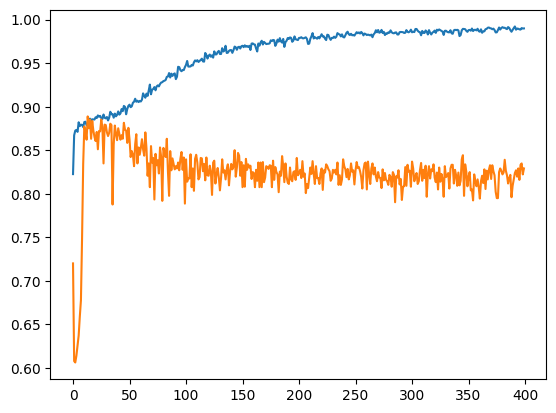

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#### **With Dropout (handles overfitting over training data)**

In [62]:
model1 = Sequential()
model1.add(Dense(256, input_dim=9, activation='swish'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='swish'))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='swish'))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())
model1.add(Dense(64, activation='swish'))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='swish'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation="sigmoid"))
# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=400, validation_split=0.2, batch_size=256, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7321 - loss: 0.5433 - val_accuracy: 0.6179 - val_loss: 0.6994
Epoch 2/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8362 - loss: 0.3901 - val_accuracy: 0.6164 - val_loss: 0.7690
Epoch 3/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8498 - loss: 0.3707 - val_accuracy: 0.6127 - val_loss: 0.7952
Epoch 4/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8507 - loss: 0.3689 - val_accuracy: 0.6158 - val_loss: 0.8092
Epoch 5/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8607 - loss: 0.3500 - val_accuracy: 0.6614 - val_loss: 0.7358
Epoch 6/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8642 - loss: 0.3470 - val_accuracy: 0.7704 - val_loss: 0.5157
Epoch 7/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8695 - loss: 0.3477 - val_accuracy: 0.8003 - val_loss: 0.4565
Epoch 8/400
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8690 - loss: 0.3386 - val_accuracy: 0.

#### **Evaluation of ANN model (with dropout)**

In [57]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ann = accuracy_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)
print("Accuracy:", acc_ann)
print("F1 Score:", f1_ann)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.89937106918239
F1 Score: 0.8754863813229572


#### **Plotting the accuracy of the ANN model over training epochs**
This curve shows that dropout handles overfitting.

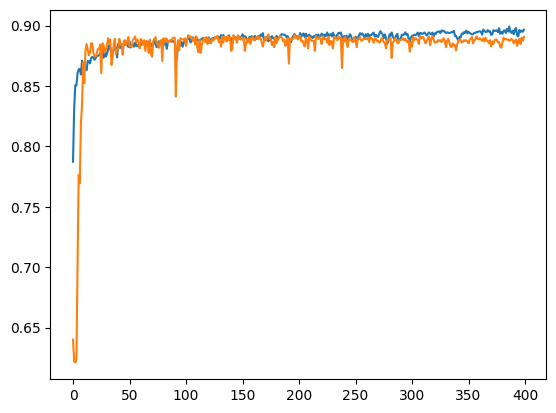

In [36]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

### **Identify and store the best validation accuracy among all models runs to select the most effective model configuration.**

In [58]:
models_list = ["decision tree", "logistic regression", "SVM", "ANN"]
acc_list = [acc_dt, acc_lr, acc_svm, acc_ann]
f1_list = [f1_dt, f1_lr, f1_svm, f1_ann]
best_acc = max(acc_list)
best_f1 = max(f1_list)
best_acc_model = models_list[acc_list.index(best_acc)]
best_f1_model = models_list[f1_list.index(best_f1)]
print(f"The best model is {best_acc_model} with an accuracy of {best_acc}")
print(f"The best model is {best_f1_model} with an F1 score of {best_f1}")

The best model is ANN with an accuracy of 0.89937106918239
The best model is ANN with an F1 score of 0.8754863813229572


### **To evaluate which batch size yields the best ANN performance (epochs = 300)**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6985 - loss: 0.6067 - val_accuracy: 0.8187 - val_loss: 0.4035
Epoch 2/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7659 - loss: 0.5256 - val_accuracy: 0.8333 - val_loss: 0.4201
Epoch 3/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7815 - loss: 0.5035 - val_accuracy: 0.8464 - val_loss: 0.3846
Epoch 4/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8019 - loss: 0.4641 - val_accuracy: 0.7794 - val_loss: 0.4599
Epoch 5/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7919 - loss: 0.4847 - val_accuracy: 0.8559 - val_loss: 0.3696
Epoch 6/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8033 - loss: 0.4668 - val_accuracy: 0.8365 - val_loss: 0.4085
Epoch 7/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8061 - loss: 0.4566 - val_accuracy: 0.8422 - val_loss: 0.3815
Epoch 8/300
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7974 - loss: 0.4646 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7185 - loss: 0.5816 - val_accuracy: 0.8024 - val_loss: 0.4567
Epoch 2/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7896 - loss: 0.4782 - val_accuracy: 0.8249 - val_loss: 0.3867
Epoch 3/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8092 - loss: 0.4633 - val_accuracy: 0.8658 - val_loss: 0.3667
Epoch 4/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8116 - loss: 0.4522 - val_accuracy: 0.8202 - val_loss: 0.4140
Epoch 5/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8277 - loss: 0.4245 - val_accuracy: 0.8753 - val_loss: 0.3473
Epoch 6/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8255 - loss: 0.4300 - val_accuracy: 0.8674 - val_loss: 0.3532
Epoch 7/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8335 - loss: 0.4127 - val_accuracy: 0.8496 - val_loss: 0.3728
Epoch 8/300
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8383 - loss: 0.3956 - val_accuracy: 0.8711

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7476 - loss: 0.5202 - val_accuracy: 0.6216 - val_loss: 0.7096
Epoch 2/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8207 - loss: 0.4280 - val_accuracy: 0.8056 - val_loss: 0.4532
Epoch 3/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.4230 - val_accuracy: 0.8527 - val_loss: 0.3666
Epoch 4/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8308 - loss: 0.4036 - val_accuracy: 0.8753 - val_loss: 0.3380
Epoch 5/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8444 - loss: 0.3912 - val_accuracy: 0.8753 - val_loss: 0.3404
Epoch 6/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8313 - loss: 0.4055 - val_accuracy: 0.8506 - val_loss: 0.3843
Epoch 7/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8337 - loss: 0.4140 - val_accuracy: 0.8684 - val_loss: 0.3441
Epoch 8/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8399 - loss: 0.4014 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7457 - loss: 0.5312 - val_accuracy: 0.6184 - val_loss: 0.7316
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8299 - loss: 0.3992 - val_accuracy: 0.6274 - val_loss: 0.7324
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8471 - loss: 0.3723 - val_accuracy: 0.7799 - val_loss: 0.4947
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8471 - loss: 0.3759 - val_accuracy: 0.8475 - val_loss: 0.3744
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8496 - loss: 0.3739 - val_accuracy: 0.8695 - val_loss: 0.3423
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8519 - loss: 0.3693 - val_accuracy: 0.8763 - val_loss: 0.3236
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8503 - loss: 0.3740 - val_accuracy: 0.8742 - val_loss: 0.3402
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8647 - loss: 0.3512 - val_accuracy: 0.8763 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7232 - loss: 0.5481 - val_accuracy: 0.6384 - val_loss: 0.7408
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8300 - loss: 0.4033 - val_accuracy: 0.6122 - val_loss: 0.7974
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8452 - loss: 0.3834 - val_accuracy: 0.6169 - val_loss: 0.7860
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8531 - loss: 0.3610 - val_accuracy: 0.6263 - val_loss: 0.8452
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8585 - loss: 0.3556 - val_accuracy: 0.6473 - val_loss: 0.7064
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8672 - loss: 0.3446 - val_accuracy: 0.7579 - val_loss: 0.5232
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8636 - loss: 0.3481 - val_accuracy: 0.7841 - val_loss: 0.4948
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8660 - loss: 0.3480 - val_accuracy: 0.8302 - val_l

<Figure size 800x500 with 0 Axes>

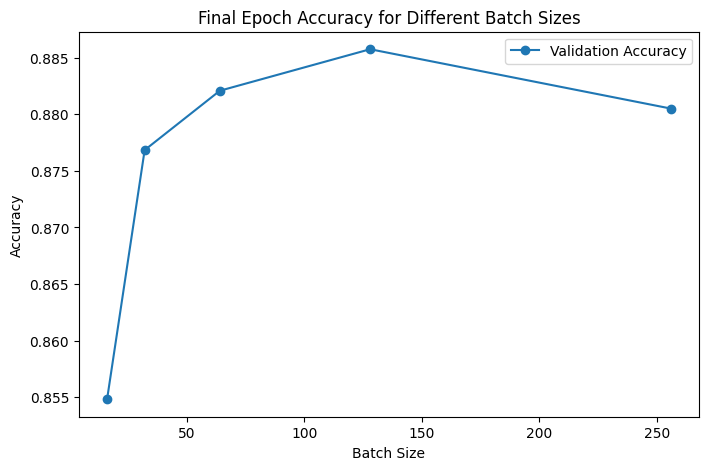

In [41]:
# List of different batch sizes to compare
batch_sizes = [16,32,64,128,256]

# Lists to store the final epoch losses for each batch size
final_train_losses = []
final_val_losses = []

final_train_accuracy = []
final_val_accuracy = []
batches=[]
for batch in batch_sizes:
    # Define the model architecture
    model = Sequential()
    model.add(Dense(256, input_dim=9, activation='swish'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))
    callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=30)
    # Compile the model with Adam optimizer
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    history = model.fit(X, y, epochs=300, validation_split=0.2, batch_size=batch, callbacks=[callback], verbose=1)

    # Save the last epoch's training and validation loss
    final_train_losses.append(history.history['loss'][-1])
    final_val_losses.append(history.history['val_loss'][-1])
    # Save the last epoch's training and validation accuracy
    final_train_accuracy.append(history.history['accuracy'][-1])
    final_val_accuracy.append(history.history['val_accuracy'][-1])
    batches.append(history.history)

# Plotting the results
plt.figure(figsize=(8, 5))

plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, final_val_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Final Epoch Accuracy for Different Batch Sizes')
plt.legend()
plt.show()


In [48]:
# Identify the best accuracy among all the mentioned batch sizes' accuracies
best_accuracy = final_val_accuracy[np.argmax(final_val_accuracy)]
print(batch_sizes[np.argmax(final_val_accuracy)])
print(best_accuracy)

128
0.8857442140579224


### **To evaluate which optimizer yields the best ANN performance (epochs = 300)**



In [43]:
optimizers = {
    "Adam": Adam(learning_rate=0.01),
    "SGD": SGD(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01),
    "Adagrad": Adagrad(learning_rate=0.01)
}

# Lists to store final losses for each optimizer
optr_names = []
losses = []
val_losses = []
train_accuracy = []
val_accuracy = []
for optr_name, optr in optimizers.items():
    # Build the model architecture
    model = Sequential()
    model.add(Dense(256, input_dim=9, activation='swish'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=optr, metrics=['accuracy'])

    history = model.fit(X, y, batch_size=128, epochs=300, validation_split = 0.2,verbose=2)

    # Store the last epoch's training and validation loss
    optr_names.append(optr_name)
    losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

    # Save the last epoch's training and validation accuracy
    train_accuracy.append(history.history['accuracy'][-1])
    val_accuracy.append(history.history['val_accuracy'][-1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
60/60 - 12s - 202ms/step - accuracy: 0.7938 - loss: 0.4663 - val_accuracy: 0.6289 - val_loss: 0.6940
Epoch 2/300
60/60 - 2s - 28ms/step - accuracy: 0.8380 - loss: 0.3966 - val_accuracy: 0.6567 - val_loss: 0.6827
Epoch 3/300
60/60 - 1s - 9ms/step - accuracy: 0.8459 - loss: 0.3775 - val_accuracy: 0.6882 - val_loss: 0.6226
Epoch 4/300
60/60 - 1s - 10ms/step - accuracy: 0.8483 - loss: 0.3773 - val_accuracy: 0.8155 - val_loss: 0.4120
Epoch 5/300
60/60 - 1s - 11ms/step - accuracy: 0.8531 - loss: 0.3696 - val_accuracy: 0.8459 - val_loss: 0.3694
Epoch 6/300
60/60 - 1s - 10ms/step - accuracy: 0.8584 - loss: 0.3578 - val_accuracy: 0.8637 - val_loss: 0.3513
Epoch 7/300
60/60 - 1s - 10ms/step - accuracy: 0.8590 - loss: 0.3613 - val_accuracy: 0.8726 - val_loss: 0.3365
Epoch 8/300
60/60 - 1s - 9ms/step - accuracy: 0.8605 - loss: 0.3577 - val_accuracy: 0.8774 - val_loss: 0.3185
Epoch 9/300
60/60 - 1s - 9ms/step - accuracy: 0.8617 - loss: 0.3579 - val_accuracy: 0.8737 - val_loss: 0.3286
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
60/60 - 5s - 84ms/step - accuracy: 0.5504 - loss: 0.7072 - val_accuracy: 0.5681 - val_loss: 0.6752
Epoch 2/300
60/60 - 1s - 8ms/step - accuracy: 0.6272 - loss: 0.6460 - val_accuracy: 0.5713 - val_loss: 0.6574
Epoch 3/300
60/60 - 0s - 8ms/step - accuracy: 0.6724 - loss: 0.6100 - val_accuracy: 0.5949 - val_loss: 0.6371
Epoch 4/300
60/60 - 1s - 11ms/step - accuracy: 0.7011 - loss: 0.5872 - val_accuracy: 0.6258 - val_loss: 0.6143
Epoch 5/300
60/60 - 1s - 11ms/step - accuracy: 0.7152 - loss: 0.5690 - val_accuracy: 0.6672 - val_loss: 0.5875
Epoch 6/300
60/60 - 1s - 10ms/step - accuracy: 0.7300 - loss: 0.5559 - val_accuracy: 0.7107 - val_loss: 0.5587
Epoch 7/300
60/60 - 0s - 8ms/step - accuracy: 0.7445 - loss: 0.5359 - val_accuracy: 0.7358 - val_loss: 0.5322
Epoch 8/300
60/60 - 0s - 8ms/step - accuracy: 0.7491 - loss: 0.5310 - val_accuracy: 0.7621 - val_loss: 0.5097
Epoch 9/300
60/60 - 0s - 8ms/step - accuracy: 0.7504 - loss: 0.5283 - val_accuracy: 0.7788 - val_loss: 0.4932
Epoch 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 33s - 551ms/step - accuracy: 0.7901 - loss: 0.4708 - val_accuracy: 0.6462 - val_loss: 0.6617
Epoch 2/300
60/60 - 1s - 9ms/step - accuracy: 0.8309 - loss: 0.4083 - val_accuracy: 0.6782 - val_loss: 0.7811
Epoch 3/300
60/60 - 1s - 10ms/step - accuracy: 0.8402 - loss: 0.3888 - val_accuracy: 0.7846 - val_loss: 0.4538
Epoch 4/300
60/60 - 1s - 12ms/step - accuracy: 0.8523 - loss: 0.3746 - val_accuracy: 0.8129 - val_loss: 0.4534
Epoch 5/300
60/60 - 1s - 9ms/step - accuracy: 0.8569 - loss: 0.3676 - val_accuracy: 0.8422 - val_loss: 0.3764
Epoch 6/300
60/60 - 1s - 11ms/step - accuracy: 0.8550 - loss: 0.3651 - val_accuracy: 0.8789 - val_loss: 0.3353
Epoch 7/300
60/60 - 1s - 10ms/step - accuracy: 0.8592 - loss: 0.3627 - val_accuracy: 0.8810 - val_loss: 0.3323
Epoch 8/300
60/60 - 1s - 9ms/step - accuracy: 0.8599 - loss: 0.3576 - val_accuracy: 0.8716 - val_loss: 0.3352
Epoch 9/300
60/60 - 1s - 8ms/step - accuracy: 0.8611 - loss: 0.3599 - val_accuracy: 0.8726 - val_loss: 0.3285
Epoch 10/300
60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 3s - 57ms/step - accuracy: 0.6420 - loss: 0.6404 - val_accuracy: 0.5608 - val_loss: 0.6632
Epoch 2/300
60/60 - 1s - 9ms/step - accuracy: 0.7274 - loss: 0.5550 - val_accuracy: 0.5660 - val_loss: 0.6743
Epoch 3/300
60/60 - 1s - 10ms/step - accuracy: 0.7600 - loss: 0.5151 - val_accuracy: 0.5823 - val_loss: 0.6962
Epoch 4/300
60/60 - 1s - 10ms/step - accuracy: 0.7575 - loss: 0.5093 - val_accuracy: 0.6064 - val_loss: 0.6835
Epoch 5/300
60/60 - 1s - 11ms/step - accuracy: 0.7765 - loss: 0.4875 - val_accuracy: 0.6384 - val_loss: 0.6413
Epoch 6/300
60/60 - 1s - 10ms/step - accuracy: 0.7867 - loss: 0.4691 - val_accuracy: 0.6819 - val_loss: 0.5850
Epoch 7/300
60/60 - 1s - 10ms/step - accuracy: 0.7873 - loss: 0.4713 - val_accuracy: 0.7406 - val_loss: 0.5318
Epoch 8/300
60/60 - 1s - 9ms/step - accuracy: 0.7988 - loss: 0.4602 - val_accuracy: 0.7783 - val_loss: 0.4846
Epoch 9/300
60/60 - 1s - 10ms/step - accuracy: 0.8014 - loss: 0.4553 - val_accuracy: 0.7951 - val_loss: 0.4548
Epoch 10/300
60

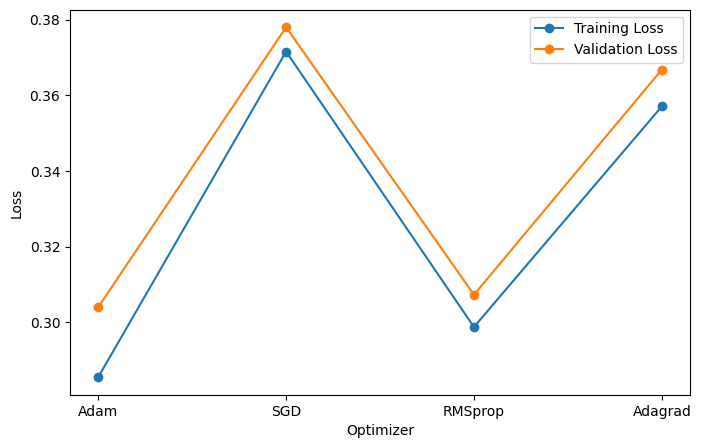

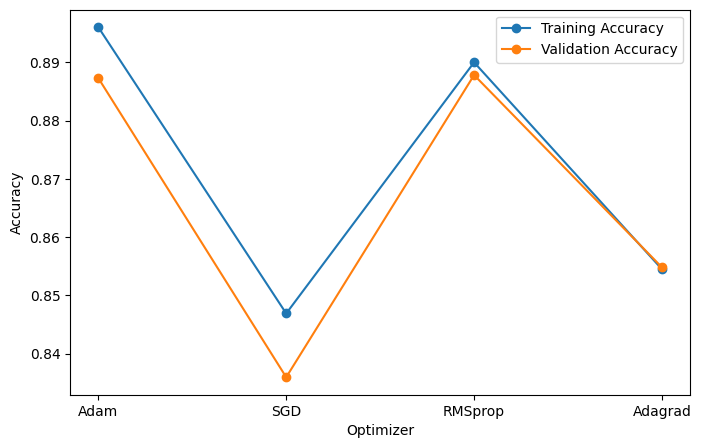

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(optr_names, losses, marker='o', label='Training Loss')
plt.plot(optr_names, val_losses, marker='o', label='Validation Loss')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(optr_names, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(optr_names, val_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Identify the best accuracy among all the mentioned optimizers' accuracies
best_accuracy = val_accuracy[np.argmax(val_accuracy)]
print(optr_names[np.argmax(val_accuracy)])
print(best_accuracy)

RMSprop
0.8878406882286072
